In [1]:
import pandas as pd

housing = pd.read_csv('zestawy danych/mieszkania_poland/Houses.csv', encoding='latin-1', index_col=0)
housing = housing[housing['sq'] < 500]
housing = housing[housing['price'] < 3000000]
housing = housing[housing['year'] <= 2023]
housing = housing[housing['year'] >= 1500]
housing = housing.drop('id',axis=1)

housing.head()

,address,city,floor,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Praga-Po³udnie Grochowska,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznañ,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23573 entries, 0 to 23763
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    23573 non-null  object 
 1   city       23573 non-null  object 
 2   floor      23573 non-null  float64
 3   latitude   23573 non-null  float64
 4   longitude  23573 non-null  float64
 5   price      23573 non-null  float64
 6   rooms      23573 non-null  float64
 7   sq         23573 non-null  float64
 8   year       23573 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.8+ MB


In [3]:
housing['address'].value_counts()

address
Mokotów                              422
Wola                                 381
Nowe Miasto Malta ul. Katowicka      377
ródmiecie                          326
Bia³o³êka                            248
                                    ... 
Bronowice Gabrieli Zapolskiej          1
Wilda Saperska                         1
Targówek Bródno ks. Piotra Skargi      1
Wilanów Krzysztofa Kielowskiego       1
Bemowo ul. Antoniego Kocjana           1
Name: count, Length: 5388, dtype: int64

In [4]:
summary = housing.describe()
summary.round(0)

,floor,latitude,longitude,price,rooms,sq,year
count,23573.0,23573.0,23573.0,23573.0,23573.0,23573.0,23573.0
mean,3.0,51.0,20.0,618371.0,3.0,59.0,2001.0
std,2.0,1.0,1.0,356842.0,1.0,26.0,30.0
min,0.0,50.0,4.0,5000.0,1.0,9.0,1535.0
25%,1.0,50.0,20.0,410103.0,2.0,42.0,1985.0
50%,2.0,52.0,20.0,520000.0,3.0,54.0,2019.0
75%,4.0,52.0,21.0,697215.0,3.0,68.0,2021.0
max,10.0,54.0,30.0,2995333.0,10.0,380.0,2023.0


In [5]:
housing_max_price = housing['price'].idxmax()

In [6]:
address_with_max_price = housing.loc[housing_max_price, 'address']

In [7]:
print(address_with_max_price)

Mokotów


In [8]:
housing_max_sq = housing['sq'].idxmax()
address_with_max_sq = housing.loc[housing_max_sq, 'city']
address_with_max_sq

'Poznañ'

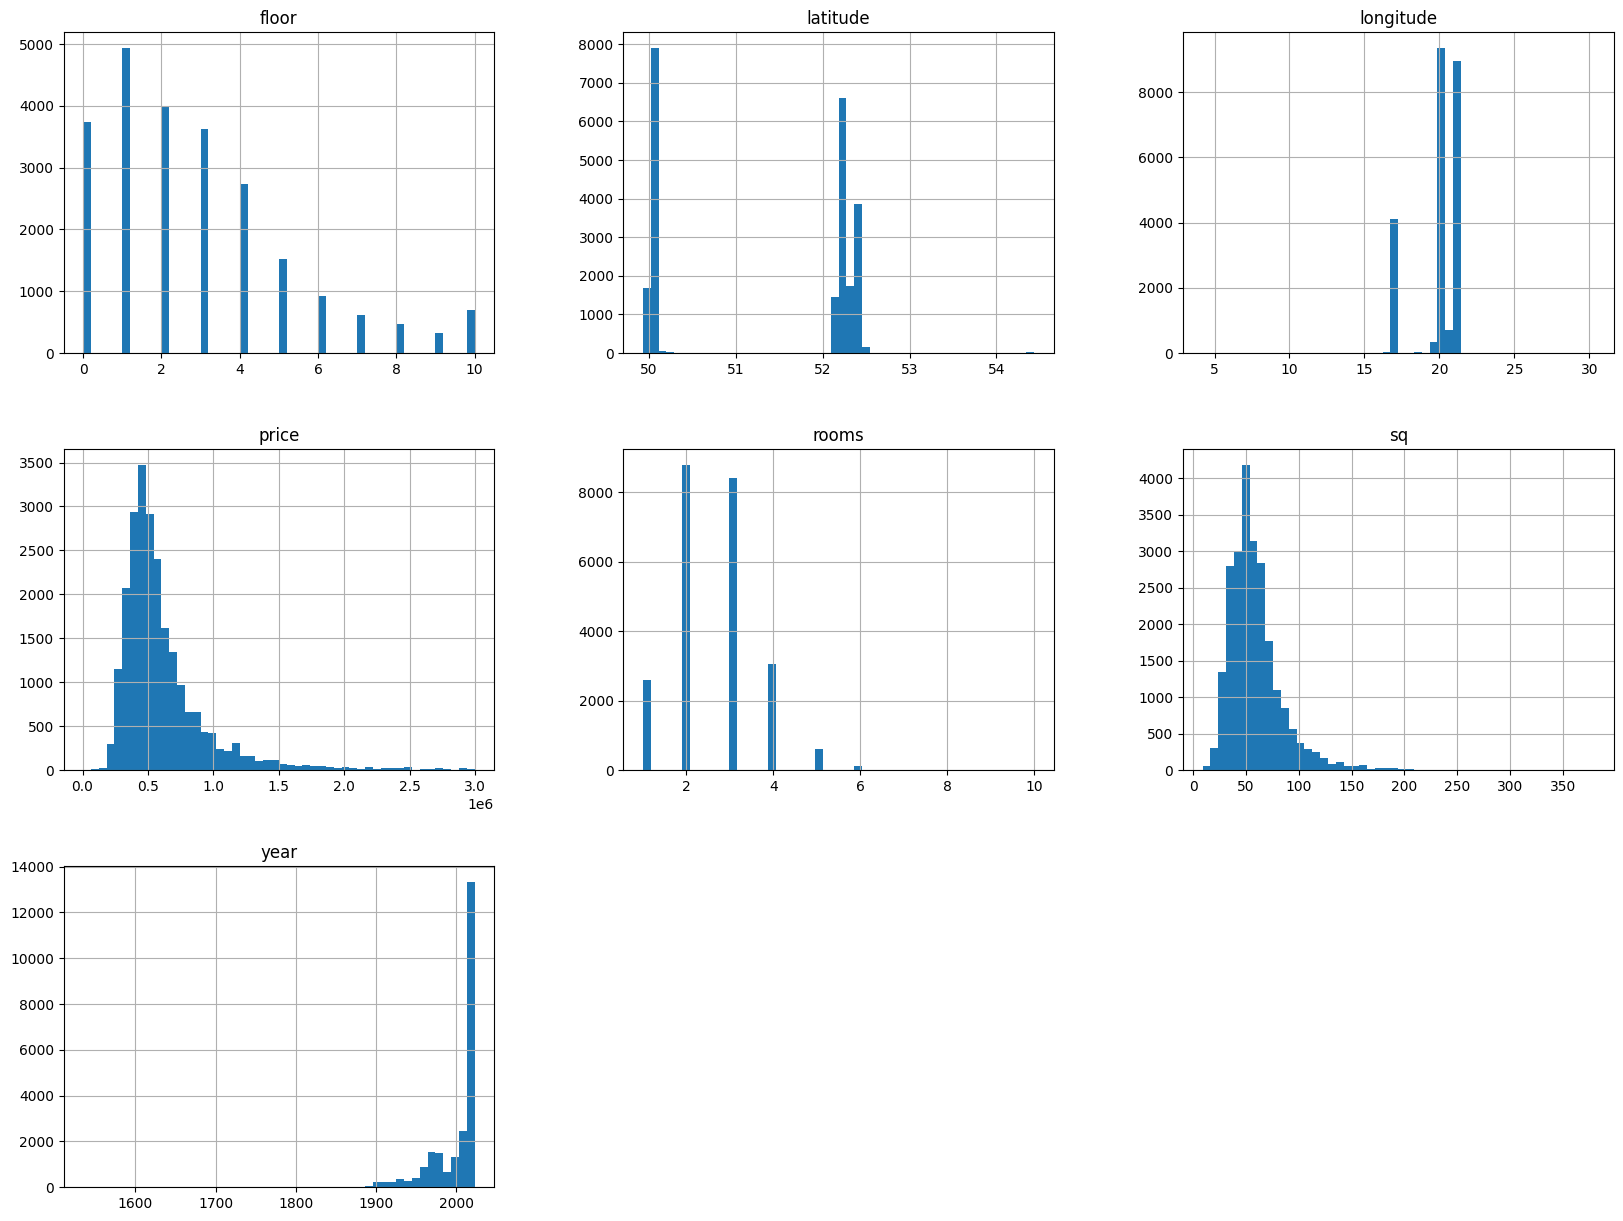

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: xlabel='longitude', ylabel='latitude'>

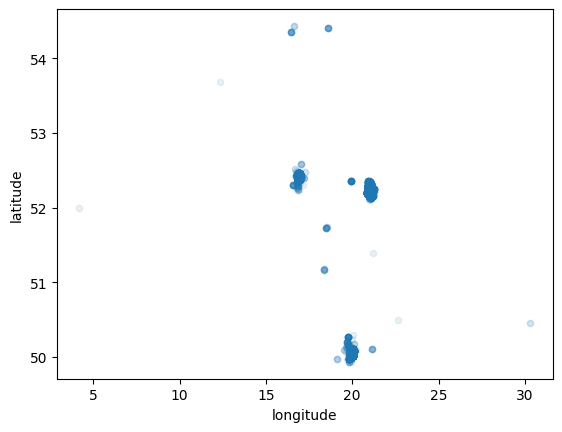

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sq', ylabel='price'>,
        <Axes: xlabel='rooms', ylabel='price'>,
        <Axes: xlabel='year', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sq'>,
        <Axes: xlabel='sq', ylabel='sq'>,
        <Axes: xlabel='rooms', ylabel='sq'>,
        <Axes: xlabel='year', ylabel='sq'>],
       [<Axes: xlabel='price', ylabel='rooms'>,
        <Axes: xlabel='sq', ylabel='rooms'>,
        <Axes: xlabel='rooms', ylabel='rooms'>,
        <Axes: xlabel='year', ylabel='rooms'>],
       [<Axes: xlabel='price', ylabel='year'>,
        <Axes: xlabel='sq', ylabel='year'>,
        <Axes: xlabel='rooms', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>]], dtype=object)

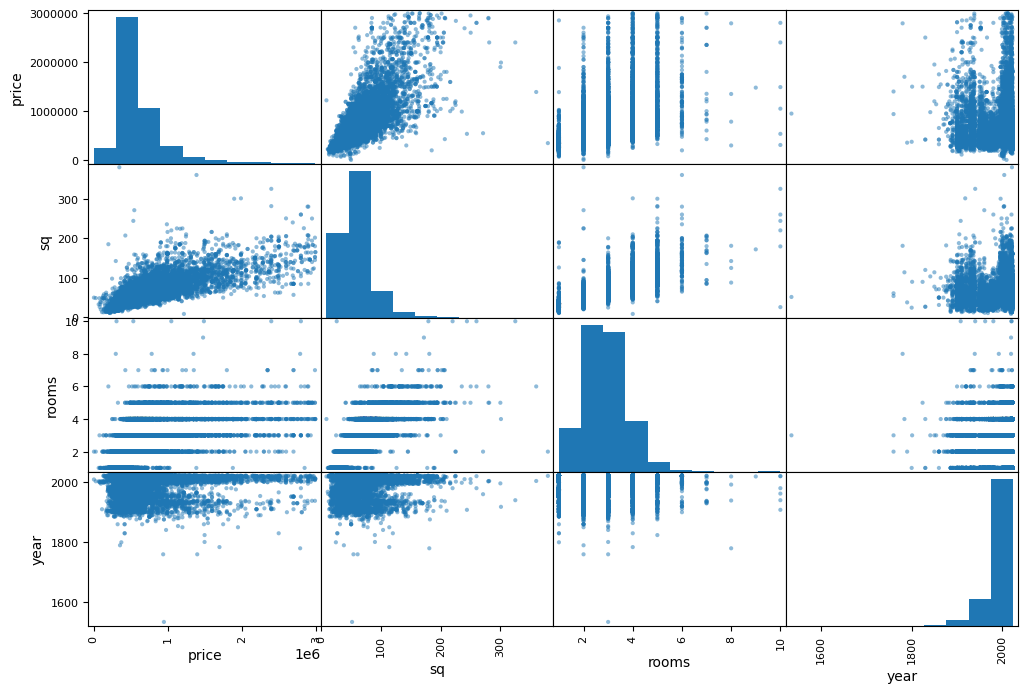

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'sq', 'rooms', 'year']

scatter_matrix(housing[attributes], figsize=(12, 8))

In [13]:
import numpy as np

housing['avg_room_size'] = housing['sq'] / housing['rooms']

numeric_columns = housing.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
correlation_matrix['price'].sort_values(ascending=False)

price            1.000000
sq               0.759504
rooms            0.528401
avg_room_size    0.325194
longitude        0.235627
floor            0.089297
latitude         0.065014
year            -0.047348
Name: price, dtype: float64

In [14]:
housing = train_set.copy()

housing_labels = train_set['price'].copy()
housing = train_set.drop('price', axis=1)
housing_without = housing.drop('address', axis=1)

In [15]:
housing_without_cat = housing_without[['city']]
housing_without_cat.head()

,city
15762,Kraków
19592,Poznañ
179,Kraków
3,Poznañ
8400,Kraków


In [16]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

housing_without_cat_encoded = one_hot.fit_transform(housing_without_cat)
housing_without_cat_encoded.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [17]:
one_hot.categories_

[array(['Kraków', 'Poznañ', 'Warszawa'], dtype=object)]

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

housing_num = housing_without.drop("city", axis=1)
sq_ix = housing_num.columns.get_loc("sq")
rooms_ix = housing_num.columns.get_loc("rooms")

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, avg_m_squared = True):
        self.avg_m_squared = avg_m_squared
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.avg_m_squared:
            avg_room_size = X.iloc[:, sq_ix] / X.iloc[:, rooms_ix]
            return np.c_[X, avg_room_size]

In [19]:
housing_num.head()

,floor,latitude,longitude,rooms,sq,year
15762,1.0,50.020524,19.960179,4.0,88.73,2020.0
19592,2.0,52.453889,16.848611,2.0,36.00,2000.0
179,1.0,50.086862,19.969699,4.0,200.00,1984.0
3,2.0,52.404212,16.882542,5.0,166.00,1935.0
8400,2.0,50.051215,19.938039,3.0,64.00,2015.0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['city']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing_without)